# FitWidget

FitWidget is a widget to fit curves (1D data) with interactive configuration options, to set constraints, adjust initial estimate parameters...



## Creating a FitWidget

First load the data.

Populating the interactive namespace from numpy and matplotlib


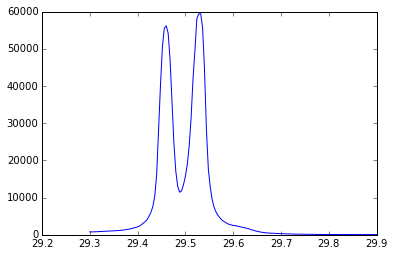

In [1]:
%pylab inline

from silx.io import spech5

specfile = spech5.SpecH5("31oct98.dat")
xdata = specfile["/22.1/measurement/TZ3"]
ydata = specfile["/22.1/measurement/If4"]
plot(xdata, ydata)

Then create a FitWidget.

In [2]:
from silx.gui import qt
from silx.gui.fit import FitWidget

a = qt.QApplication([])

fw = FitWidget()
fw.setData(x=xdata, y=ydata)
fw.show()


![FitWidget](fitwidget1.png)
The selection of fit theories and background theories can be done through the interface. Additional configuration parameters can be set in a dialog, by clicking the configure button, to alter the behavior of the estimation function (peak search parameters) or to set global constraints. 

![FitConfig](fitconfig.png)

When the configuration is done, click the Estimate button. Now you may change individual constraints or adjust initial estimated parameters. 

You can also add peaks by selecting *Add* in the dropdown list in the *Constraints* column of any parameter, or reduce the number of peaks by selecting *Ignore*.

When you are happy with the estimated parameters and the constraints, you can click the "Fit" button. At the end of the fit process, you can again adjust the constraints and estimated parameters, and fit again. Only click "Estimate" if you want to reset the estimation and all constraints (this will overwrite all adjustements you have done).

## Open the FitWidget through a PlotWindow


A PlotWindow can be setup to show a fit icon. Clicking the icon will open a FitWidget with the active curve loaded as data.

In [3]:
from silx.gui import qt
from silx.gui.plot import PlotWindow

a = qt.QApplication([])

pw = PlotWindow(fit=True)
pw.addCurve(x=xdata, y=ydata)
pw.show()

All that is left to do is to select the curve and click the *Fit* icon. When the fitting is complete, the fitted function is plotted.

## Exercice

Write a cubic polynomial function $y= ax^3 + bx^2 + cx + d$ and its corresponding estimation function (use  $a=1, b=1, c=1, d=1$ for initial estimated parameters).

Generate synthetic data.

Create a FitWidget and add a cubic polynomial function to the dropdown list. Test it on the synthetic data.

### Polynomial function

Tips: 
 - Read the documentation for the module ``silx.math.fit.fittheory`` to use the correct signature for the polynomial and for the estimation functions. 
 - Read the documentation for the module ``silx.math.fit.leastsq`` to use the correct format for constraints. Disable all constraints (set them to FREE)

Links:
 - http://pythonhosted.org/silx/modules/math/fit/fittheory.html#silx.math.fit.fittheory.FitTheory.function
 - http://pythonhosted.org/silx/modules/math/fit/fittheory.html#silx.math.fit.fittheory.FitTheory.estimate
 - http://pythonhosted.org/silx/modules/math/fit/leastsq.html#silx.math.fit.leastsq



In [2]:
# fill-in the blanks
def cubic_poly(x, a, b, c, d):
    return ...
    
def estimate_cubic_params(x, y):
    initial_params = ...
    constraints = ...
    return initial_params, constraints
    

### Synthetic data

Tip: use the `cubic_poly` function


In [3]:
import numpy
x = numpy.linspace(0, 100, 250)
a, b, c, d = 0.02, -2.51, 76.76, 329.14
y = ...


### FitWidget with custom function

Tips:

- you need to define a customized FitManager to initialize a FitWidget with custom functions
    
Doc:

- http://www.silx.org/doc/silx/dev/modules/math/fit/fitmanager.html#silx.math.fit.fitmanager.FitManager.addtheory

In [4]:
%gui qt
from silx.gui import qt
from silx.gui.fit import FitWidget 
from silx.math.fit import FitManager

a = qt.QApplication([])

# use a customized fit manager to add your own function
fitmanager = FitManager()
...


fitwidget = FitWidget(...)
fitwidget.setData(x=x, y=y)

fitwidget.show()



TypeError: __init__() got an unexpected keyword argument 'config_widget'